## Package installation

In [3]:
!pip install -e /home/aku7cf/DREAMS/DREAMS_python
# !pip install -e /path/to/DREAMS_python

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/aku7cf/DREAMS/DREAMS_python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for dreams_python (pyproject.toml) ... done
  Created wheel for dreams_python: filename=dreams_python-0.1.0-0.editable-py3-none-any.whl size=4485 sha256=33355cf010cdcdb9cae6e3484daf1158aecdb95d1094e16798e652ccf8dd54b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-gm1y33vb/wheels/93/9c/36/d4c59b3fc31ec2b5dc143e4a986198ab2224d05d41a91e194c
Successfully built dreams_python
  Attempting uninstall: dreams_python
    Found existing installation: dreams_python 0.1.0
    Uninstalling dreams_python-0.1.0:
      Successfully uninstalled dreams_python-0.1.0


In [4]:
import dreams_python

In [5]:
import numpy as np

## Load in Data

This package assumes that the DREAMS simulations live in a directory structure like:
```
base_path/
|- FOF_Subfind/
|  |- CDM
|  |  |- varied_mass
|  |  |- MW_zooms
|  |  |  |- SB5
|  |  |  |  |- <data lives on this level>
|- Rockstar/
|  |- ...
|- Sims/
|  |- ...
|- Parameters/
|  |- ...
```

To instantiate the class you'll need to specify <em>at least</em> the `base_path`

```
instance = dreams_python.DREAMS('/base/path/')
```

The default is the mass varied TNG suite (Torrey et al. In Preparation), which is

```CDM/varied_mass/SB6/```

In [6]:
mvs = dreams_python.DREAMS('/standard/DREAMS') ## default is mass varied suite (CDM/varied_mass/SB6/)

You can further specific the instance by giving

```
instance = dreams_python.DREAMS('/base/path/', suite='varied_mass', DM_type='CDM', sobol_number=6)
```

for the mass varied suite or 

```
instance = dreams_python.DREAMS('/base/path/', suite='MW_zooms', DM_type='WDM', sobol_number=4)
```

for the [WDM suite](https://ui.adsabs.harvard.edu/abs/2025ApJ...982...68R/abstract)

In [7]:
mw_wdm = dreams_python.DREAMS('/standard/DREAMS',suite='MW_zooms',DM_type='WDM',sobol_number=4)

Note also that the `CDM/varied_mass/SB9/` suite is named with `run` instead of `box`. You can change this with:

In [8]:
rvs = dreams_python.DREAMS('/standard/DREAMS',suite='MW_zooms',DM_type='WDM',sobol_number=4, box_or_run='run')

Regardless, for the rest of this notebook we'll stick to the <em>mass varied suite</em>

In [9]:
run  = 4  ## load simulation number 4
snap = 90 ## load snapshot 90 (z=0)

## Subfind Group Catalogs

See [IllustrisTNG Documentation Page](https://www.tng-project.org/data/docs/specifications/#sec2) for all relevant group catalog information

In [10]:
grp_cat = mvs.read_group_catalog(run, snap)
print('All Group Catalog keys:')
print(grp_cat.keys())

All Group Catalog keys:
dict_keys(['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'Subh

You can also load in a subset of the group catalogs using the `keys` keyword

In [11]:
keys_to_load = ['GroupMass','GroupMassType','GroupFirstSub','SubhaloMassType'] 
grp_cat = mvs.read_group_catalog(run, snap, keys=keys_to_load)
print('Subset Group Catalog keys:')
print(grp_cat.keys())

Subset Group Catalog keys:
dict_keys(['GroupMass', 'GroupMassType', 'GroupFirstSub', 'SubhaloMassType'])


## Particle Data

See [IllustrisTNG Documentation Page](https://www.tng-project.org/data/docs/specifications/#sec1) for all relevant particle data information

In [12]:
prt_cat = mvs.read_snapshot(run, snap)
print('All Snapshot Catalogs keys:')
print(prt_cat.keys())

All Snapshot Catalogs keys:
dict_keys(['PartType0/AllowRefinement', 'PartType0/CenterOfMass', 'PartType0/Coordinates', 'PartType0/Density', 'PartType0/ElectronAbundance', 'PartType0/GFM_AGNRadiation', 'PartType0/GFM_CoolingRate', 'PartType0/GFM_Metallicity', 'PartType0/GFM_Metals', 'PartType0/GFM_MetalsTagged', 'PartType0/GFM_WindDMVelDisp', 'PartType0/GFM_WindHostHaloMass', 'PartType0/HighResGasMass', 'PartType0/InternalEnergy', 'PartType0/MagneticField', 'PartType0/MagneticFieldDivergence', 'PartType0/Masses', 'PartType0/NeutralHydrogenAbundance', 'PartType0/ParticleIDs', 'PartType0/Potential', 'PartType0/StarFormationRate', 'PartType0/SubfindDMDensity', 'PartType0/SubfindDensity', 'PartType0/SubfindHsml', 'PartType0/SubfindVelDisp', 'PartType0/Velocities', 'PartType1/Coordinates', 'PartType1/ParticleIDs', 'PartType1/Potential', 'PartType1/SubfindDMDensity', 'PartType1/SubfindDensity', 'PartType1/SubfindHsml', 'PartType1/SubfindVelDisp', 'PartType1/Velocities', 'PartType1/Masses', 'P

You can also load in a subset of the particle data with the `keys` and `part_types` keywords.

In [13]:
keys_to_load = ['Masses','Coordinates','ParticleIDs']
part_types = [0, 4] ## gas and stars
prt_cat = mvs.read_snapshot(run, snap, part_types=part_types, keys=keys_to_load)
print('Subset of snapshot data:')
print(prt_cat.keys())

Subset of snapshot data:
dict_keys(['PartType0/Masses', 'PartType4/Masses', 'PartType0/Coordinates', 'PartType4/Coordinates', 'PartType0/ParticleIDs', 'PartType4/ParticleIDs'])


There are a few different particle types in the DREAMS simulations. They are usually:

| Number | Description |
| ------- | ----------|
| 0 | gas |
| 1 | high-resolution dark matter |
| 2 | low-resolution dark matter (background) |
| 4 | stars (and wind particles) |
| 5 | black holes |

Note that not all of the particle types have the same properties!

You can specify this more closely by giving the particle type in each key

In [14]:
keys_to_load = ['PartType4/GFM_Metallicity','PartType1/Coordinates']
prt_cat = mvs.read_snapshot(run, snap, keys=keys_to_load)
print('Subset of snapshot data:')
print(prt_cat.keys())

Subset of snapshot data:
dict_keys(['PartType4/GFM_Metallicity', 'PartType1/Coordinates'])


## Parameters files

Each of the DREAMS suites has variations of the astrophysics, cosmology, dark matter physics, halo mass, and/or resolution.

These are stored in the `/base/path/Parameters/...` directory and can be read in with `read_param_file()`

In [15]:
params, header = mvs.read_param_file('TNG_SB6.txt')
print(header)
print(params)

['logMhalo', 'OmegaM', 'Sigma8', 'SN1', 'SN2', 'AGN']
[[ 9.02626215  0.32593181  0.87138418  0.97492115 10.97811102  0.13222103]
 [11.61816851  0.27460343  0.81427753  4.91173172  6.21218538  0.03894067]
 [13.52799854  0.34890096  0.85851907  2.46819187  5.0022731   0.05129682]
 ...
 [13.5235262   0.27440697  0.79863986  3.41594975  4.27543361  0.0268995 ]
 [11.62233538  0.3487045   0.86413835  6.79693215  6.88515369  0.0809236 ]
 [ 9.02133249  0.29675049  0.81319175  1.29209117 12.84116738  0.27480086]]


## Header

Each of the files has a header with some background information about the simulation

In [16]:
hdr = mvs.get_header(run, snap)
print('Header attributes:')
print(hdr.keys())

Header attributes:
dict_keys(['BoxSize', 'Composition_vector_length', 'Flag_Cooling', 'Flag_DoublePrecision', 'Flag_Feedback', 'Flag_Metals', 'Flag_Sfr', 'Flag_StellarAge', 'Git_commit', 'Git_date', 'HubbleParam', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Omega0', 'OmegaBaryon', 'OmegaLambda', 'Redshift', 'Time', 'UnitLength_in_cm', 'UnitMass_in_g', 'UnitVelocity_in_cm_per_s'])


For convenience we also provide some functions the load specific values from the header

In [17]:
scf = mvs.get_scf(run, snap)
print(scf, 1/scf-1)
h = mvs.get_h(run, snap)
print(h)
box_size = mvs.get_box_size(run, snap)
print(box_size)

0.9999999999999998 2.220446049250313e-16
0.6909
60000.0


## Identifying the Target of Interest

There is typically only 1 halo of interest in each simulation. To identify that halo in the box you can use the `get_target_fof_index` function

In [18]:
params, header = mvs.read_param_file('TNG_SB6.txt')

target_masses = params[:, 0]
print(f'We are targeting a system with halo mass {target_masses[run]:0.3f} log Msun')

We are targeting a system with halo mass 10.761 log Msun


In [19]:
fof_idx = mvs.get_target_fof_index(run, snap, target_masses[run])
print(fof_idx)

0


In [20]:
h = mvs.get_h(run, snap)
grp_cat = mvs.read_group_catalog(run, snap, keys=['GroupMass','SubhaloMass','SubhaloMassType'])

this_target_mass = grp_cat['GroupMass'][fof_idx]
this_target_mass = np.log10(this_target_mass * 1.00E+10 / h) ## convert to log Msun

In [21]:
print(f'We found a target with halo mass {this_target_mass:0.3f} log Msun')

We found a target with halo mass 10.646 log Msun


In [22]:
dmass = target_masses[run] - this_target_mass
print(f'Our selected halo is off by {dmass:0.3f} dex')

Our selected halo is off by 0.115 dex


Typical agreement between the hydro simulation and targeted halo mass is ~0.1 dex and in the functionality of `get_target_fof_index` is restricted to 0.5 dex (although this can be increased if desired)

We can also identify the "central" (i.e., most massive subhalo within our halo)

In [23]:
central_idx = mvs.get_target_central_subhalo_index(run, snap, target_masses[run])

central_mass = np.log10(grp_cat['SubhaloMass'][central_idx] * 1.00E+10/h)
print(f'Central Mass: {central_mass:0.3f} log Msun')
central_stellar_mass = np.log10(grp_cat['SubhaloMassType'][central_idx, 4] * 1.00E+10/h)
print(f'Central Stellar Mass: {central_stellar_mass:0.3f} log Msun')

Central Mass: 10.625 log Msun
Central Stellar Mass: 7.855 log Msun


## Determining Mass Resolution of simulation

In [24]:
hdr = mvs.get_header(run, snap)

h = hdr['HubbleParam']

masstable = hdr['MassTable'] * 1.00E+10/h
print(f'Our simulation has dark matter particle mass of {np.log10(masstable[1]):0.3f} log Msun')

Our simulation has dark matter particle mass of 5.566 log Msun


The mass table only displays constant mass particles (high res dm). To you can figure out the initial baryon mass via $\Omega_{\rm M}$ and $\Omega_{\rm baryon}$

In [25]:
omega_m = hdr['Omega0']
omega_b = hdr['OmegaBaryon']

initial_baryon_res = masstable[1] * (omega_m - omega_b) / (omega_m)

print(f'Our simulation has dark matter particle mass of {np.log10(initial_baryon_res):0.3f} log Msun')

Our simulation has dark matter particle mass of 5.503 log Msun


### Stellar Mass-Halo Mass Relation for first few simulations

In [26]:
import matplotlib.pyplot as plt

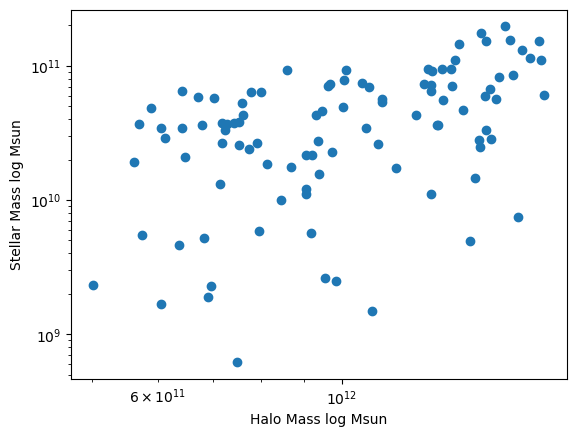

In [48]:
snap = 90
runs = np.arange(0,100)

mw_cdm = dreams_python.DREAMS('/standard/DREAMS',suite='MW_zooms',DM_type='CDM',sobol_number=5)

h = mw_cdm.get_h(0, snap) ## all same for mw wdm suite

params, header = mw_cdm.read_param_file('CDM_TNG_MW_SB5.txt')
target_masses = np.ones(len(params[:,0])) * 12.0 ## no halo mass variations

stellar_mass = np.zeros(len(runs))
halo_mass    = np.zeros(len(runs))

for run in runs:
    grp_cat = mw_cdm.read_group_catalog(run, snap, keys=['GroupMassType'])
    fof_idx = mw_cdm.get_target_fof_index(run, snap, target_masses[run], max_dm=0.5)

    if fof_idx == -1:
        print(run, target_masses[run])
    
    stellar_mass[run] = grp_cat['GroupMassType'][fof_idx, 4]
    ## high and low res dm!!
    halo_mass[run] = grp_cat['GroupMassType'][fof_idx, 1] + grp_cat['GroupMassType'][fof_idx, 2] 

stellar_mass *= 1.00E+10 / h
halo_mass    *= 1.00E+10 / h

plt.scatter(halo_mass, stellar_mass)
plt.xlabel('Halo Mass log Msun')
plt.ylabel('Stellar Mass log Msun')
plt.xscale('log')
plt.yscale('log')
plt.show()